## 1. Implement a reinforcement learning agent in Python and illustrate the steps involved in designing a basic Reinforcement learning (RL) system.

In [248]:
import random
import pandas as pd

class Environment:
  def __init__(self):
    self.steps_left=100

  def get_observation(self):
    return [0.0,0.0,0.0,0.0]

  def get_actions(self):
    return [0,1]

  def is_done(self):
    return self.steps_left==0

  def action(self,action):
    if self.is_done():
      print("Game Over")
    self.steps_left-=1
    return random.random() #Return random number between 0.0 and 1.0

class Agent:
  def __init__(self):
    self.total_reward=0.0

  def steps(self,env):
    current_obs=env.get_observation()
    actions=env.get_actions()
    reward=env.action(random.choice(actions)) #Return a random element from a list [0,1]
    self.total_reward+=reward

#Instantiate the classes using constructors
env=Environment()
agent=Agent()

while not env.is_done():
  agent.steps(env)

print("Total reward got: %d "% agent.total_reward)

Total reward got: 48 


In [249]:

steps=[]
rewards=[]
for i in range(5,51,2):
  env=Environment()
  agent=Agent()

  while not env.is_done():
    agent.steps(env)

  steps.append(i)
  rewards.append(agent.total_reward)

df=pd.DataFrame({"steps":steps,"rewards":rewards})
df

,steps,rewards
0,5,51.281917
1,7,52.660518
2,9,55.289749
3,11,47.443304
4,13,51.873513
5,15,42.830212
6,17,48.427890
7,19,48.729449
8,21,46.076545
9,23,59.299575


<Axes: xlabel='steps'>

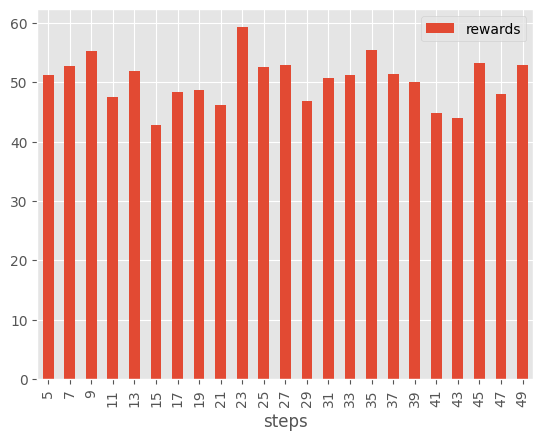

In [250]:
df.plot.bar(x="steps")

## 2. Formulate Multi-armed Bandit (MAB) problem for the scenario discussed below. The website www.adwinning.com has five banners for a single advertisement. The task of the advertiser is to find the best advertisement banner that is liked by most of the customers. Hence, devise a solution by implementing a suitable exploration strategy.

In [251]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [252]:
df=pd.DataFrame()
for i in range(5):
  df['Banner_type_'+str(i)]=np.random.randint(0,2,100000)
df

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,0,1,0,0
1,0,1,1,0,1
2,0,0,1,0,0
3,1,0,0,1,1
4,1,0,1,1,0
...,...,...,...,...,...
99995,0,1,0,0,1
99996,0,0,1,1,0
99997,0,0,1,0,0
99998,0,1,0,1,0


In [253]:
num_iter=100000
num_banner=5

In [254]:
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

**Define Softmax**

In [255]:
def softmax(T):
  denom=sum([np.exp(i/T) for i in Q])
  probs=[np.exp(i/T)/denom for i in Q]
  arm=np.random.choice(num_banner,p=probs)
  return arm

In [256]:
T=50
for i in range(num_iter):
    banner = softmax(0.5)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)
    T=T*0.99

[0.49764116 0.49258888 0.49668841 0.50332671 0.49634263]
Optimal banner is  4


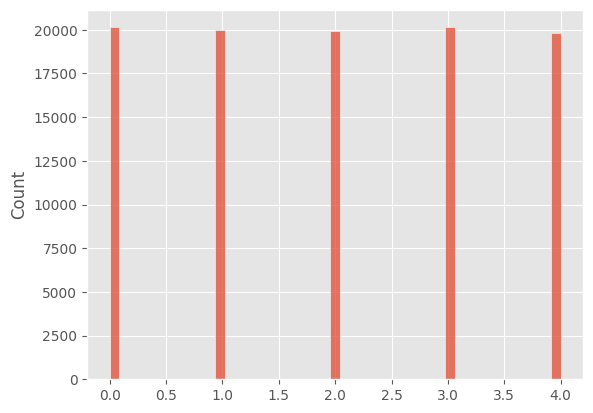

In [257]:
print(Q)
print("Optimal banner is ",np.argmax(Q)+1)
ax=sns.histplot(np.array(selected_banner))
plt.show()

## 3. In certain situations you have to select one action from a set of 10 possible actions (for that particular state). After each choice you receive a numerical reward chosen from a stationary probability distribution (i.e. the true reward does not change) depending upon the action you selected. Your objective is to maximize the expected total reward over some time period. Formalize the above scenario as k-armed bandit problem and implement in Python to illustrate the exploration and exploitation strategy with epsilon value 0.5.

In [258]:
df=pd.DataFrame()
for i in range(10):

  df['Action_'+str(i)]=np.random.randint(0,2,100)
df

,Action_0,Action_1,Action_2,Action_3,Action_4,Action_5,Action_6,Action_7,Action_8,Action_9
0,1,0,0,1,1,0,1,0,1,1
1,1,0,1,0,1,1,0,0,0,1
2,0,1,1,1,1,1,1,0,0,1
3,0,1,1,0,0,1,0,1,1,0
4,0,1,0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,0,0,0,1,0
96,0,0,1,0,0,1,0,0,1,1
97,0,1,0,1,1,0,1,1,0,0
98,0,0,1,1,1,1,1,1,1,0


In [259]:
num_iter=100
num_action=10 #action
count= np.zeros(num_action)
sum_rewards=np.zeros(num_action)
Q=np.zeros(num_action)
selected_action=[]

In [260]:
def epsilon_greedy(epsilon):
  if 1/num_action<epsilon: #uniform returns random floating number between low and high ////use random.random if distribution is not mentioned
    return np.random.choice(num_action) #exploration
  else:
    return np.argmax(Q) #exploitation

In [261]:
for i in range(num_iter):
    action = epsilon_greedy(0.5)
    reward=df.values[i,action]
    count[action] += 1
    sum_rewards[action] += reward
    Q[action] = sum_rewards[action] / count[action]
    selected_action.append(action)

In [262]:
print(Q)

[0.6875     0.28571429 0.53846154 0.85714286 0.875      0.8
 0.71428571 0.66666667 0.55555556 0.5       ]


In [263]:
print("Optimal action is ",np.argmax(Q)+1)

Optimal action is  5


## 4. A doctor aims at evaluating ‘k’ possible treatments for an epidemic disease in which incoming patients are partitioned into k groups. The actions are treatment, reward is survival or death of the patient and it is set to 1, if treatment is successful, otherwise 0. After a while the majority of patients can be put to the best found treatment. Formalize the above scenario as k-armed bandit problem and implement in Python to illustrate the exploration and exploitation strategy with epsilon value 0.5.

In [264]:
df=pd.DataFrame()
num_iter=100
k_treatment=7 #action
for i in range(k_treatment):
  df['Treatment_type_'+str(i)]=np.random.randint(0,2,100000)
df

,Treatment_type_0,Treatment_type_1,Treatment_type_2,Treatment_type_3,Treatment_type_4,Treatment_type_5,Treatment_type_6
0,1,0,1,0,0,1,0
1,1,0,0,0,1,1,0
2,0,1,0,1,1,0,0
3,1,0,1,1,0,0,1
4,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...
99995,1,1,1,1,1,1,1
99996,0,0,1,0,1,0,0
99997,1,1,1,0,1,1,0
99998,1,1,1,1,0,0,1


In [265]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

In [266]:
def epsilon_greedy(epsilon):
  if 1/k_treatment<epsilon: #uniform returns random floating number between low and high ////use random.random if distribution is not mentioned
    return np.random.choice(k_treatment) #exploration
  else:
    return np.argmax(Q) #exploitation

In [267]:
for i in range(num_iter):
    treatment = epsilon_greedy(0.5)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)

In [268]:
print(Q)

[0.42857143 0.5        0.625      0.21428571 0.58333333 0.53846154
 0.46153846]


In [269]:
print("Best Treatment is ",np.argmax(Q)+1)

Best Treatment is  3


## 5. Define methods for various types of exploration strategies with illustrative comparison of results for the scenario in Q.4.

In [270]:
df=pd.DataFrame()
num_iter=100
k_treatment=7 #action
for i in range(k_treatment):
  df['Treatment_type_'+str(i)]=np.random.randint(0,2,100000)
df

,Treatment_type_0,Treatment_type_1,Treatment_type_2,Treatment_type_3,Treatment_type_4,Treatment_type_5,Treatment_type_6
0,1,1,1,1,1,0,0
1,1,1,0,1,1,1,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
99995,0,0,1,0,0,1,0
99996,0,1,1,0,0,0,1
99997,1,1,1,1,1,0,1
99998,1,1,0,1,0,1,0


In [271]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]
Q_results=[]
Best_treatment_all=[]

In [272]:
def softmax(T):
  denom=sum([np.exp(i/T) for i in Q])
  probs=[np.exp(i/T)/denom for i in Q]

  arm=np.random.choice(k_treatment,p=probs)
  return arm

In [273]:
def thompson_sampling(alpha,beta):
  samples=[np.random.beta(alpha[i]+1,beta[i]+1) for i in range(k_treatment)]
  return np.argmax(samples)

In [274]:
def UCB(i):
  ucb=np.zeros(k_treatment)
  if i< 2:
    return i
  else:
    for arm in range(k_treatment):
      ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])
    return np.argmax(ucb)

In [275]:
def epsilon_greedy(epsilon):
  if 1/k_treatment<epsilon: #uniform returns random floating number between low and high ////use random.random if distribution is not mentioned
    return np.random.choice(k_treatment) #exploration
  else:
    return np.argmax(Q) #exploitation

In [276]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

for i in range(num_iter):
    treatment = epsilon_greedy(0.5)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)

Q_results.append(Q)
Best_treatment_all.append(np.argmax(Q)+1)

In [277]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]
T=50
for i in range(num_iter):
    treatment = softmax(0.5)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)
    T=T*0.99
Q_results.append(Q)
Best_treatment_all.append(np.argmax(Q)+1)

In [278]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

for i in range(num_iter):
    treatment =UCB(i)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)
Q_results.append(Q)
Best_treatment_all.append(np.argmax(Q)+1)

<ipython-input-274-f070cd45c3c6>:7: RuntimeWarning: divide by zero encountered in double_scalars
  ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])


In [279]:
alpha=np.zeros(k_treatment)
beta=np.zeros(k_treatment)

count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

for i in range(num_iter):
    treatment =thompson_sampling(alpha,beta)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)
    if reward==1:
      alpha[treatment]=alpha[treatment]+1
    else:
      beta[treatment]=beta[treatment]+1
Q_results.append(Q)
Best_treatment_all.append(np.argmax(Q)+1)

In [280]:
methods={0:"Epsilon Greedy",1:"Softmax Exploration",2:"Upper Confidence Bound",3:"Thompson Sampling"}
for i in range(len(methods)):
  print("\n\nUsing",methods[i],"\nResult is",Q_results[i],"Optimum treatment is",Best_treatment_all[i])



Using Epsilon Greedy 
Result is [0.66666667 0.61111111 0.5        0.5        0.36363636 0.64285714
 0.4       ] Optimum treatment is 1


Using Softmax Exploration 
Result is [0.68421053 0.68181818 0.3        0.35714286 0.47058824 0.53846154
 0.4       ] Optimum treatment is 1


Using Upper Confidence Bound 
Result is [0.53333333 0.53333333 0.4        0.53846154 0.5        0.4
 0.76      ] Optimum treatment is 7


Using Thompson Sampling 
Result is [0.5        0.4        0.33333333 0.5        0.42857143 0.5
 0.60869565] Optimum treatment is 7


## 6. Formulate k-armed bandit and implement in Python to illustrate the exploration and exploitation strategy with epsilon value 0.5 for the scenario given below. An online entertainment media has posted more than one banner for a single advertisement of a popular TV show. Now you are asked to find out which banner is most liked by the people subscribed to the media. Also, suggest a suitable reinforcement learning based solution for a recommendation system like Netflix to personalize the artwork for TV shows according to user behavior.

In [281]:
df=pd.DataFrame()
for i in range(5):
  df['Banner_type_'+str(i)]=np.random.randint(0,2,100000)
df

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,0,1,1,1
1,1,0,0,0,0
2,0,0,0,1,0
3,0,1,1,1,0
4,0,1,0,0,0
...,...,...,...,...,...
99995,0,0,1,1,0
99996,1,0,0,0,0
99997,1,0,1,0,0
99998,1,1,1,0,1


In [282]:
num_iter=100000
num_banner=5
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

In [283]:
def thompson_sampling(alpha,beta):
  samples=[np.random.beta(alpha[i]+1,beta[i]+1) for i in range(num_banner)]
  return np.argmax(samples)

In [284]:
alpha=np.zeros(num_banner)
beta=np.zeros(num_banner)

In [285]:
for i in range(num_iter):
    banner =thompson_sampling(alpha,beta)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)
    if reward==1:
      alpha[banner]=alpha[banner]+1
    else:
      beta[banner]=beta[banner]+1

In [286]:
print(Q)

[0.50309413 0.49954811 0.49656235 0.50057729 0.49709275]


In [287]:
print("Optimal banner is ",np.argmax(Q)+1)

Optimal banner is  1


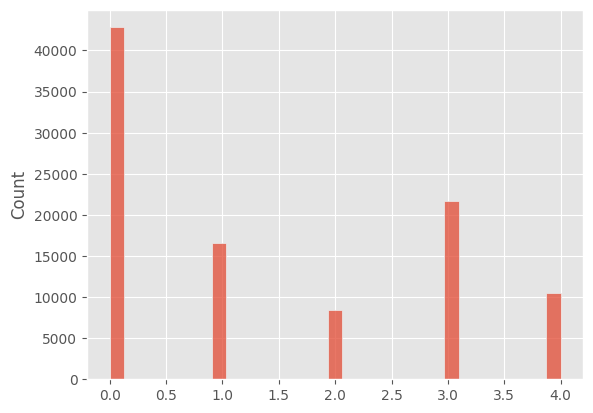

In [288]:
ax=sns.histplot(np.array(selected_banner))
plt.show()

## 7. If five different banners are posted online for the scenario discussed in Question .6, plot the best found treatment and perform the following.<br> a. Implement any two exploration strategies that are not used in Question.6 and compare the results.<br>

In [289]:
num_iter=100000
num_banner=5
Q_results=[]
Best_Ad_all=[]

In [290]:
def epsilon_greedy(epsilon):
  if np.random.uniform(0,1)<epsilon: #uniform returns random floating number between low and high ////use random.random if distribution is not mentioned
    return np.random.choice(num_banner) #exploration
  else:
    return np.argmax(Q) #exploitation

In [291]:
def UCB(i):
  ucb=np.zeros(num_banner)
  if i< 2:
    return i
  else:
    for arm in range(num_banner):
      ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])
    return np.argmax(ucb)

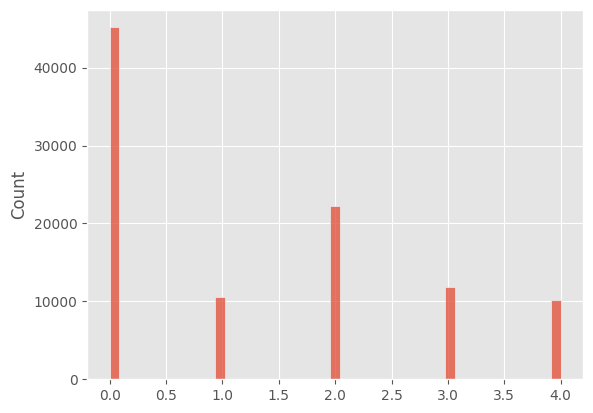

In [292]:
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

for i in range(num_iter):
    banner = epsilon_greedy(0.5)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)


Q_results.append(Q)
Best_Ad_all.append(np.argmax(Q)+1)
ax=sns.histplot(np.array(selected_banner))
plt.show()

<ipython-input-291-714fb36eaa50>:7: RuntimeWarning: divide by zero encountered in double_scalars
  ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])


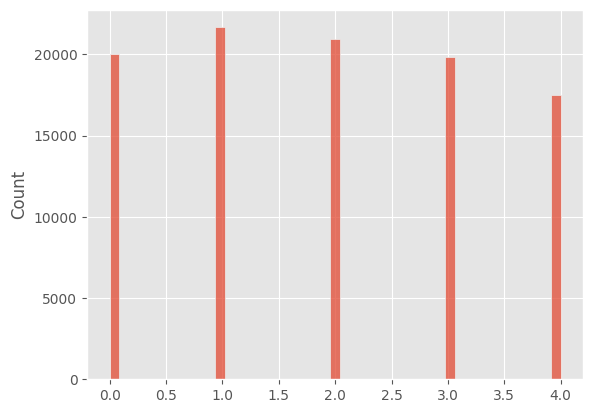

In [293]:
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

for i in range(num_iter):
    banner =UCB(i)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)

Q_results.append(Q)
Best_Ad_all.append(np.argmax(Q)+1)
ax=sns.histplot(np.array(selected_banner))
plt.show()

In [294]:
methods={0:"Epsilon Greedy",1:"Upper Confidence Bound"}
for i in range(len(methods)):
  print("\n\nUsing",methods[i],"\nResult is",Q_results[i],"Optimum treatment is",Best_Ad_all[i])



Using Epsilon Greedy 
Result is [0.50098497 0.50004745 0.50029204 0.49848714 0.49886465] Optimum treatment is 1


Using Upper Confidence Bound 
Result is [0.49725384 0.49854577 0.49847226 0.4970775  0.49489126] Optimum treatment is 2


## b. The epsilon value is varied between 0.15 and 0.9 for Question.7 (a) and report your observation.

In [295]:

for epsilon in np.arange(0.15, 0.91, 0.15):  # Vary epsilon from 0.15 to 0.9
    count = np.zeros(num_banner)
    sum_rewards = np.zeros(num_banner)
    Q = np.zeros(num_banner)
    selected_banner = []

    for i in range(num_iter):
        banner = epsilon_greedy(epsilon)
        reward=df.values[i,banner] # Reward from a normal distribution
        count[banner] += 1
        sum_rewards[banner] += reward
        Q[banner] = sum_rewards[banner] / count[banner]
        selected_banner.append(banner)

    print(f"Epsilon = {epsilon}")
    print("Estimated Action Values:")
    print(Q)
    print("Number of times each action was selected:")
    print(count)
    print("\n")
    print("Optimal banner is ",np.argmax(Q)+1)







Epsilon = 0.15
Estimated Action Values:
[0.49992637 0.50241654 0.50195567 0.50232095 0.5007545 ]
Number of times each action was selected:
[27162. 53589.  4602.  6032.  8615.]


Optimal banner is  2
Epsilon = 0.3
Estimated Action Values:
[0.5044788  0.50367727 0.49487942 0.50347088 0.49133408]
Number of times each action was selected:
[40301. 36984.  6054. 10372.  6289.]


Optimal banner is  1
Epsilon = 0.44999999999999996
Estimated Action Values:
[0.49924138 0.50367024 0.498238   0.50140417 0.50178032]
Number of times each action was selected:
[14500. 35420. 11067. 13175. 25838.]


Optimal banner is  2
Epsilon = 0.6
Estimated Action Values:
[0.50143901 0.49628153 0.50094752 0.49432632 0.49604222]
Number of times each action was selected:
[43780. 13043. 12137. 18154. 12886.]


Optimal banner is  1
Epsilon = 0.75
Estimated Action Values:
[0.49548635 0.50518721 0.50046019 0.49915003 0.50285312]
Number of times each action was selected:
[17724. 23423. 17384. 15883. 25586.]


Optimal banne